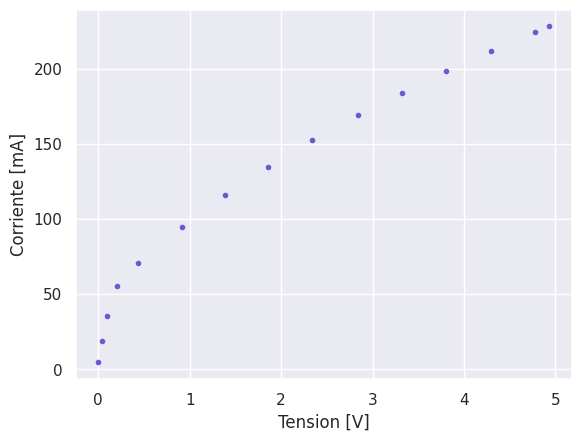

In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from scipy.optimize import curve_fit

# protek 506


def mkdir(dir):
    try:
        os.mkdir(dir)
    except:
        pass


mkdir("figures")
mkdir("figures/lamparita")

mediciones = [
    # escala mV
    (0.0, 4.5),
    (0.045, 18.5),
    (0.095, 35.5),
    # escala v
    (0.202, 55.6),
    (0.435, 70.9),
    (0.917, 94.6),
    (1.383, 115.7),
    (1.86, 134.8),
    (2.34, 152.4),
    (2.842, 168.9),
    (3.32, 183.9),
    (3.808, 198.1),
    (4.78, 224.2),
    (4.29, 211.4),
    (4.93, 228.0),
]

mediciones = list(zip(*mediciones))
tensiones = np.array(mediciones[0])
corrientes = np.array(mediciones[1])

sb.set_theme()

plt.figure(1)
plt.xlabel("Tension [V]")
plt.ylabel("Corriente [mA]")
plt.plot(tensiones, corrientes, ".", color="slateblue")
plt.savefig("figures/lamparita.pdf")


def ajustes(tensiones, corrientes):

    def ajuste(x, a, b):
        return a*x+b
    for i in range(len(tensiones)-2, 0, -1):
        x = tensiones[i:]
        y = corrientes[i:]
        coefs, cov = curve_fit(ajuste, x, y, [1, 1])
        errors = np.sqrt(np.diag(cov))
        x_fit = np.linspace(x[0], x[-1], 1000)
        y_fit = ajuste(x_fit, *coefs)
        plt.figure(10)
        plt.plot(x_fit, y_fit, color="orange")
        plt.plot(x, y, ".", color="slateblue")
        plt.savefig(f"figures/lamparita/{i=}.pdf")
        plt.clf()

In [4]:

ajustes(tensiones, corrientes)

/home/marcsid/.local/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:881: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


<Figure size 640x480 with 0 Axes>